# Abstract
State notebook purpose here

The idea of this notebook is to explore relationships among dataset variables. This is helpful to get a better taste of how data were generated and the their physical meaning.

## Read Data
Read/Import data here

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import awkward as ak

# Options for pandas
# pd.options.display.max_columns = 50
# pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format
pd.pandas.set_option('display.max_columns', None)

REPO_PATH = Path().absolute().parent.parent
DATA_PATH = REPO_PATH / "pnet_data/singlerho"
# DATA_PATH = REPO_PATH / "pnet_data/rho_full"

In [2]:
## SINGLERHO: OLD DATA

events_folder = [fn.name for fn in DATA_PATH.iterdir()][0]
file_chunks = [fn.name for fn in (DATA_PATH / events_folder).iterdir()]

print(f"Found {len(file_chunks)} chunks\n\n")

chunk_keys_num = list()
for i, chunk_name in enumerate(file_chunks):
    chunk_data = uproot.open(DATA_PATH / events_folder / chunk_name)
    chunk_keys_num.append(len(list(chunk_data.keys())))
    print(f"Chunk {i=}; existing keys: {chunk_data.keys()}")

print(
    f"The distribution of keys per event is the following: [value, count]\n\n{np.array(np.unique(chunk_keys_num, return_counts=True)).T}"
)

Found 42 chunks


Chunk i=0; existing keys: ['EventTree;1', 'ClusterTree;1']
Chunk i=1; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=2; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=3; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=4; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=5; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=6; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=7; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=8; existing keys: ['EventTree;1', 'ClusterTree;1']
Chunk i=9; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=10; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=11; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=12; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=13; existing keys: ['EventTree;1', 'Clu

In [3]:
### RHO_FULL: NEW DATA

# chunk_data = uproot.open(DATA_PATH / "rho_full.root")
# cellgeo_data = uproot.open(DATA_PATH / "cell_geo.root") # calorimeter geometry information

In [4]:
CaloSample = {
    "PreSamplerB": 0,
    "EMB1": 1,
    "EMB2": 2,
    "EMB3": 3,
    "LAr": 4,
    #     "barrel": 5,
    "PreSamplerE": 6,
    "EME1": 7,
    "EME2": 8,
    "EME3": 9,
    #     "LAr": 10,  # ?? repeated
    "EM": 11,
    #     "endcap": 12,
    "HEC0": 13,
    "HEC1": 14,
    "HEC2": 15,
    "HEC3": 16,
    #     "Hadronic end cap cal.": 17,
    "TileBar0": 18,
    "TileBar1": 19,
    "TileBar2": 20,
    # Tile barrel
    "TileGap1": 21,
    "TileGap2": 22,
    "TileGap3": 23,
    #     "Tile gap (ITC & scint)": 25,
    "TileExt0": 26,
    "TileExt1": 27,
    "TileExt2": 28,
    #     "Tile extended barrel
    "FCAL0": 29,
    "FCAL1": 30,
    "FCAL2": 31,
    #     "Forward EM endcap Unknown": 31
}

CaloSample = {k: i for k, i in enumerate(CaloSample.keys())}
CaloSample

# chunk_data["EventTree"].arrays(["nCluster", "m_cluster_cell_centerCellLayer"], library="pd")

{0: 'PreSamplerB',
 1: 'EMB1',
 2: 'EMB2',
 3: 'EMB3',
 4: 'LAr',
 5: 'PreSamplerE',
 6: 'EME1',
 7: 'EME2',
 8: 'EME3',
 9: 'EM',
 10: 'HEC0',
 11: 'HEC1',
 12: 'HEC2',
 13: 'HEC3',
 14: 'TileBar0',
 15: 'TileBar1',
 16: 'TileBar2',
 17: 'TileGap1',
 18: 'TileGap2',
 19: 'TileGap3',
 20: 'TileExt0',
 21: 'TileExt1',
 22: 'TileExt2',
 23: 'FCAL0',
 24: 'FCAL1',
 25: 'FCAL2'}

In [5]:
chunk_data["EventTree"].typenames()

{'runNumber': 'int32_t',
 'eventNumber': 'int64_t',
 'lumiBlock': 'int32_t',
 'coreFlags': 'uint32_t',
 'mcEventNumber': 'int32_t',
 'mcChannelNumber': 'int32_t',
 'mcEventWeight': 'float',
 'NPV': 'int32_t',
 'actualInteractionsPerCrossing': 'float',
 'averageInteractionsPerCrossing': 'float',
 'weight_pileup': 'float',
 'correct_mu': 'float',
 'rand_run_nr': 'int32_t',
 'rand_lumiblock_nr': 'int32_t',
 'nTruthPart': 'int32_t',
 'pdgId': 'std::vector<int32_t>',
 'status': 'std::vector<int32_t>',
 'barcode': 'std::vector<int32_t>',
 'truthPartPt': 'std::vector<float>',
 'truthPartE': 'std::vector<float>',
 'truthPartMass': 'std::vector<float>',
 'truthPartEta': 'std::vector<float>',
 'truthPartPhi': 'std::vector<float>',
 'nTrack': 'int32_t',
 'trackPt': 'std::vector<float>',
 'trackP': 'std::vector<float>',
 'trackMass': 'std::vector<float>',
 'trackEta': 'std::vector<float>',
 'trackPhi': 'std::vector<float>',
 'trackNumberOfPixelHits': 'std::vector<int32_t>',
 'trackNumberOfSCTHits'

In [6]:
selected_cols = [
    "eventNumber",
    "pdgId",
    "nTruthPart",
    "truthPartPt",
    "truthPartE",
    "truthPartEta",
    "truthPartPhi",
    "nTrack",
    "trackPt",
    "trackEta",
    "trackPhi",
    "clusterPt",
    "clusterE",
    "clusterEta",
    "clusterPhi",
    'cluster_cell_dR_min',
    'cluster_cell_dR_max',
    'cluster_cell_dEta_min',
    'cluster_cell_dEta_max',
    'cluster_cell_dPhi_min',
    'cluster_cell_dPhi_max',
    'm_cluster_cell_centerCellEta',
    'm_cluster_cell_centerCellPhi',
    'm_cluster_cell_centerCellLayer',
]

events = chunk_data["EventTree"].arrays(selected_cols, library="pd")

to_cast_cols = [
    col for col in events.columns if isinstance(events[col][0], ak.Array)
]

events[to_cast_cols] = events[to_cast_cols].map(lambda x: ak.to_list(x))

events.dtypes

eventNumber                        int64
pdgId                             object
nTruthPart                         int32
truthPartPt                       object
truthPartE                        object
truthPartEta                      object
truthPartPhi                      object
nTrack                             int32
trackPt                           object
trackEta                          object
trackPhi                          object
clusterPt                         object
clusterE                          object
clusterEta                        object
clusterPhi                        object
cluster_cell_dR_min               object
cluster_cell_dR_max               object
cluster_cell_dEta_min             object
cluster_cell_dEta_max             object
cluster_cell_dPhi_min             object
cluster_cell_dPhi_max             object
m_cluster_cell_centerCellEta      object
m_cluster_cell_centerCellPhi      object
m_cluster_cell_centerCellLayer    object
dtype: object

In [7]:
truth_cols = [
    "pdgId",
    "truthPartPt",
    "truthPartE",
    #     "truthPartMass",
    "truthPartEta",
    "truthPartPhi",
]
truth_df = events[selected_cols[:1] + truth_cols].explode(truth_cols)

truth_df

,eventNumber,pdgId,truthPartPt,truthPartE,truthPartEta,truthPartPhi
0,3220116,-213,110.4375,297.4757,-1.6475,-3.1123
0,3220116,111,102.1888,272.1749,-1.6355,-3.1158
1,3221919,213,472.8550,593.9253,0.7011,2.4557
1,3221919,111,154.6749,195.4636,0.7112,2.4470
2,3221342,-213,30.4454,30.7986,-0.0396,-1.2653
...,...,...,...,...,...,...
319997,4676250,111,425.5264,462.0832,-0.4116,-2.7094
319998,4677304,-213,908.9780,"1,227.9077",-0.8149,2.0391
319998,4677304,111,759.3288,"1,024.3867",-0.8130,2.0395
319999,4677261,213,448.7929,449.5187,0.0568,-1.6348


In [8]:
events.query("nTrack==1")

,eventNumber,pdgId,nTruthPart,truthPartPt,truthPartE,truthPartEta,truthPartPhi,nTrack,trackPt,trackEta,trackPhi,clusterPt,clusterE,clusterEta,clusterPhi,cluster_cell_dR_min,cluster_cell_dR_max,cluster_cell_dEta_min,cluster_cell_dEta_max,cluster_cell_dPhi_min,cluster_cell_dPhi_max,m_cluster_cell_centerCellEta,m_cluster_cell_centerCellPhi,m_cluster_cell_centerCellLayer
0,3220116,"[-213, 111]",2,"[110.4375228881836, 102.18875122070312]","[297.4756774902344, 272.17486572265625]","[-1.6475147008895874, -1.6355053186416626]","[-3.112333297729492, -3.1157939434051514]",1,[8.092719078063965],[-1.785575270652771],[-3.0689988136291504],[],[],[],[],[],[],[],[],[],[],[],[],[]
1,3221919,"[213, 111]",2,"[472.8550109863281, 154.67486572265625]","[593.92529296875, 195.4635772705078]","[0.7011030912399292, 0.7111505270004272]","[2.455704689025879, 2.4469854831695557]",1,[326.7279357910156],[0.6961853504180908],[2.45993709564209],"[173.4399871826172, 10.531497955322266]","[216.18350219726562, 12.907271385192871]","[0.6883891224861145, 0.6596693396568298]","[2.468356132507324, 2.4025328159332275]","[0.012252574786543846, 0.0021873540244996548]","[0.40997114777565, 0.2714901268482208]","[-0.011944591999053955, -0.00019472837448120117]","[-0.338389128446579, 0.19033068418502808]","[-0.0027298927307128906, 0.002178668975830078]","[0.23145008087158203, -0.19360041618347168]","[0.6764445304870605, 0.6594746112823486]","[2.4656262397766113, 2.4047114849090576]","[3, 1]"
2,3221342,"[-213, 111]",2,"[30.445354461669922, 21.199703216552734]","[30.798633575439453, 21.20216941833496]","[-0.03955245390534401, -0.013858667574822903]","[-1.2652974128723145, -1.1707838773727417]",1,[9.670117378234863],[-0.095136359333992],[-1.4760774374008179],"[17.462888717651367, 2.619318962097168, 2.0720...","[17.463947296142578, 2.635047674179077, 2.0787...","[-0.011014442890882492, -0.10953377187252045, ...","[-1.1603456735610962, -1.4191169738769531, -1....","[0.00298074958845973, 0.017526036128401756, 0....","[0.17069807648658752, 0.18967370688915253, 0.1...","[0.00017743557691574097, -0.013869233429431915...","[0.020036986097693443, 0.1595337688922882, -0....","[-0.0029754638671875, 0.01071476936340332, 0.0...","[-0.16951799392700195, -0.102591872215271, 0.1...","[-0.010837007313966751, -0.12340300530195236, ...","[-1.1633211374282837, -1.4084022045135498, -1....","[2, 3, 1, 13]"
3,3220180,"[-213, 111]",2,"[187.78460693359375, 161.32720947265625]","[732.2901000976562, 625.2473754882812]","[-2.037158966064453, -2.0307846069335938]","[1.4612504243850708, 1.4594742059707642]",1,[25.168373107910156],[-2.074954032897949],[1.472256064414978],[],[],[],[],[],[],[],[],[],[],[],[],[]
4,3220742,"[-213, 111]",2,"[158.3241424560547, 114.17950439453125]","[203.46556091308594, 147.76568603515625]","[0.7380838990211487, 0.7493535876274109]","[-2.636500358581543, -2.6399805545806885]",1,[43.914695739746094],[0.7088329195976257],[-2.6274502277374268],[28.516544342041016],[34.936763763427734],[0.6590378284454346],[-2.6066577434539795],[0.004012804012745619],[0.27883878350257874],[-0.0014027953147888184],[-0.2590378224849701],[0.003759622573852539],[0.10320115089416504],[0.6576350331306458],[-2.602898120880127],[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319994,4676009,"[213, 111]",2,"[33.34956359863281, 24.27098846435547]","[33.873416900634766, 24.392009735107422]","[-0.1539202630519867, -0.09966696053743362]","[0.25485992431640625, 0.25634631514549255]",1,[9.22432804107666],[-0.2964394986629486],[0.25063803791999817],"[24.275907516479492, 2.719663143157959, 0.8889...","[24.400592803955078, 2.8392319679260254, 0.924...","[-0.10130983591079712, -0.29545265436172485, -...","[0.25260522961616516, 0.20592810213565826, 0.0...","[0.005878830794245005, 0.010395227000117302, 0...","[0.10721500962972641, 0.15557001531124115, 0.1...","[-0.0015497282147407532, 0.009431779384613037,...","[-0.02654513716697693, -0.0074637532234191895,...","[-

In [9]:
track_cols = [
    #     "nTrack",
    "trackPt",
    #     "trackP",
    #     "trackMass",
    "trackEta",
    "trackPhi",
    #     "trackD0",
    #     "trackZ0",
]
track_df = events.query("nTrack==1")[selected_cols[:1] +
                                     track_cols].explode(track_cols)
track_df

,eventNumber,trackPt,trackEta,trackPhi
0,3220116,8.0927,-1.7856,-3.0690
1,3221919,326.7279,0.6962,2.4599
2,3221342,9.6701,-0.0951,-1.4761
3,3220180,25.1684,-2.0750,1.4723
4,3220742,43.9147,0.7088,-2.6275
...,...,...,...,...
319994,4676009,9.2243,-0.2964,0.2506
319995,4677424,2.3581,-0.8670,-1.8413
319997,4676250,47.1943,-0.4285,-2.6919
319998,4677304,126.2592,-0.8252,2.0366


In [10]:
cluster_cols = [
    "clusterE",
    "clusterPt",
    "clusterEta",
    "clusterPhi",
    #     "cluster_nCells",
    #     "cluster_sumCellE"
]
cluster_df = events[selected_cols[:1] + cluster_cols].explode(cluster_cols)

cluster_df

,eventNumber,clusterE,clusterPt,clusterEta,clusterPhi
0,3220116,NaN,NaN,NaN,NaN
1,3221919,216.1835,173.4400,0.6884,2.4684
1,3221919,12.9073,10.5315,0.6597,2.4025
2,3221342,17.4639,17.4629,-0.0110,-1.1603
2,3221342,2.6350,2.6193,-0.1095,-1.4191
...,...,...,...,...,...
319997,4676250,22.8763,21.0116,-0.4182,-2.6749
319998,4677304,1.8004,1.4747,-0.6530,1.8505
319999,4677261,392.3077,391.9646,0.0418,-1.6278
319999,4677261,1.6640,1.6363,0.1838,-1.6264


# Explorative/Data Visualization
Explore and visualize data


First we apply a selection cut and consider only events with:

- exactly one track per event
- at least one cluster

In [11]:
# selection_cut = (truth_df.truthPartEta < 0.6) & (truth_df.truthPartEta < -0.6)
# selected_events = truth_df[selection_cut].eventNumber.unique()
selected_tracks = track_df[~track_df.trackPt.isna()].eventNumber
selected_clusters = cluster_df[~cluster_df.clusterE.isna()].eventNumber
selected_events = list(set(selected_tracks).intersection(selected_clusters))

## 3D Scatterplot: $\eta, \phi, P_T$ 

The idea is to explore the relationship between the energy/momentum and direction of the particles at truth, track and cluster level.

The expectation is that we should have correlated quantities albeit not exactly same values due to limits of the detector measurement.

Test cases:
 - event= 3376415: 2 truth, 1 track, no cluster

Inspecting event number: 3283866
Inspecting event number: 4581467
Inspecting event number: 4658544
Inspecting event number: 4475976
Inspecting event number: 3281820
Inspecting event number: 4419462
Inspecting event number: 4659654
Inspecting event number: 3267963
Inspecting event number: 4460984
Inspecting event number: 4473582
Inspecting event number: 4450931
Inspecting event number: 4443965
Inspecting event number: 4413610
Inspecting event number: 4579455
Inspecting event number: 3386146
Inspecting event number: 4421099
Inspecting event number: 4567761
Inspecting event number: 3248355
Inspecting event number: 4573236
Inspecting event number: 4426516


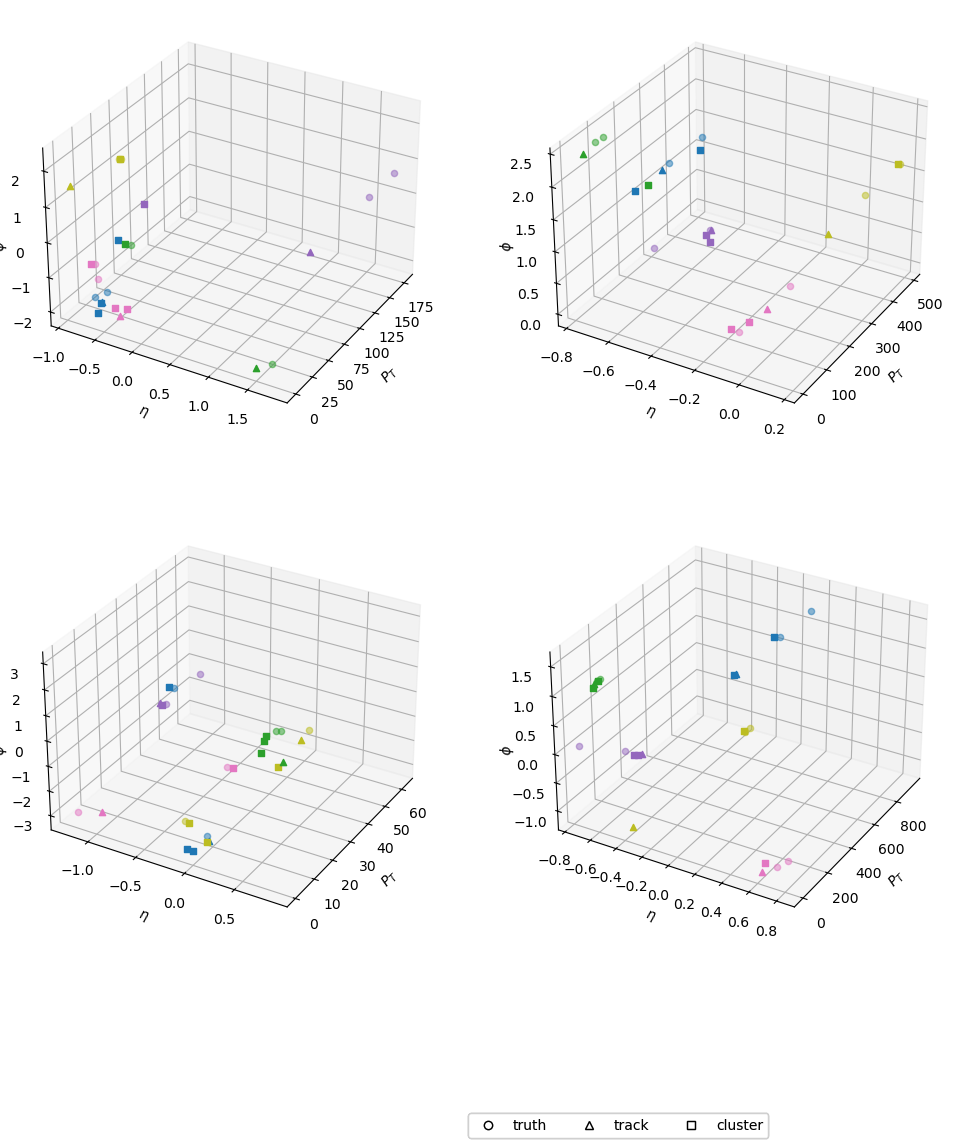

In [12]:
import matplotlib.pyplot as plt
import matplotlib
# from matplotlib import cm
from matplotlib.legend_handler import HandlerBase


class MarkerHandler(HandlerBase):

    def create_artists(self, legend, tup, xdescent, ydescent, width, height,
                       fontsize, trans):
        return [
            plt.Line2D([width / 2], [height / 2.],
                       ls="",
                       marker=tup[1],
                       fillstyle="none",
                       color=tup[0],
                       transform=trans)
        ]


N_EVENTS = 5

cmap = matplotlib.colormaps["tab20"]  #matplotlib.cm.get_cmap('tab20')
EVENT_COLORS = "red blue green black purple".split(" ")

fig = plt.figure(figsize=(12, 12))

for i in range(4):
    sampled_events = np.random.choice(selected_events, size=N_EVENTS)

    # plotting
    legend_markers = ["o", "^", "s"]
    legend_labels = ['truth', 'track', 'cluster']
    #     fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    # ax = fig.add_axes(MyAxes3D(ax, 'l'))

    for event_id, event_color in zip(sampled_events,
                                     np.arange(0, 1, 1 / len(sampled_events))):
        event_color = cmap(event_color)
        print(f"Inspecting event number: {event_id}")

        event_truth = truth_df[truth_df.eventNumber == event_id]
        event_track = track_df[track_df.eventNumber == event_id]
        event_cluster = cluster_df[cluster_df.eventNumber == event_id]

        for pdgid, eta, phi, Pt in zip(event_truth.pdgId,
                                       event_truth.truthPartEta,
                                       event_truth.truthPartPhi,
                                       event_truth.truthPartPt):
            #     plt.plot(eta, phi, marker='o', markersize=E, label=pdgid)
            ts = ax.scatter(eta,
                            Pt,
                            phi,
                            marker='o',
                            label="truth",
                            alpha=0.5,
                            color=event_color)
    #         ax.text(eta, Pt, phi, f"ev={event_id}\nid={pdgid}")
    #     plt.legend()

        for eta, phi, Pt in zip(event_track.trackEta, event_track.trackPhi,
                                event_track.trackPt):
            #     plt.plot(eta, phi, marker='x', markersize=s)
            ax.scatter(eta,
                       Pt,
                       phi,
                       marker='^',
                       label="track",
                       color=event_color)

        for eta, phi, Pt in zip(event_cluster.clusterEta,
                                event_cluster.clusterPhi,
                                event_cluster.clusterPt):
            #     plt.plot(eta, phi, marker='s', markersize=s)
            ax.scatter(eta,
                       Pt,
                       phi,
                       marker='s',
                       label="cluster",
                       color=event_color)

    ax.set_xlabel('$\eta$')
    ax.set_ylabel('$P_T$')
    ax.set_zlabel('$\phi$', labelpad=-1)
    ax.zaxis._axinfo['juggled'] = (1, 2, 0)

    legend = ax.legend(
        list(zip(["black", "black", "black"], legend_markers)),
        legend_labels,
        handler_map={tuple: MarkerHandler()},
        loc="center left",
        #     bbox_to_anchor=(1.1, 0.5),
        bbox_transform=fig.transFigure,
        ncol=3,
        bbox_to_anchor=[0.5, -0.05],
        borderaxespad=0,
    )

plt.show()

## Track matching efficiency

In [13]:
cluster_cols = [
    "clusterE",
    "clusterPt",
    "clusterEta",
    "clusterPhi",
    'cluster_cell_dR_min',
    'cluster_cell_dR_max',
    'cluster_cell_dEta_min',
    'cluster_cell_dEta_max',
    'cluster_cell_dPhi_min',
    'cluster_cell_dPhi_max',
    'm_cluster_cell_centerCellEta',
    'm_cluster_cell_centerCellPhi',
    'm_cluster_cell_centerCellLayer',
]

cluster_df = events[selected_cols[:1] + cluster_cols].explode(cluster_cols)

cluster_df

,eventNumber,clusterE,clusterPt,clusterEta,clusterPhi,cluster_cell_dR_min,cluster_cell_dR_max,cluster_cell_dEta_min,cluster_cell_dEta_max,cluster_cell_dPhi_min,cluster_cell_dPhi_max,m_cluster_cell_centerCellEta,m_cluster_cell_centerCellPhi,m_cluster_cell_centerCellLayer
0,3220116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3221919,216.1835,173.4400,0.6884,2.4684,0.0123,0.4100,-0.0119,-0.3384,-0.0027,0.2315,0.6764,2.4656,3
1,3221919,12.9073,10.5315,0.6597,2.4025,0.0022,0.2715,-0.0002,0.1903,0.0022,-0.1936,0.6595,2.4047,1
2,3221342,17.4639,17.4629,-0.0110,-1.1603,0.0030,0.1707,0.0002,0.0200,-0.0030,-0.1695,-0.0108,-1.1633,2
2,3221342,2.6350,2.6193,-0.1095,-1.4191,0.0175,0.1897,-0.0139,0.1595,0.0107,-0.1026,-0.1234,-1.4084,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319997,4676250,22.8763,21.0116,-0.4182,-2.6749,0.0099,0.3184,-0.0053,0.2682,-0.0084,0.1715,-0.4235,-2.6833,3
319998,4677304,1.8004,1.4747,-0.6530,1.8505,0.0344,0.3881,0.0030,-0.3526,-0.0342,0.1621,-0.6500,1.8162,13
319999,4677261,392.3077,391.9646,0.0418,-1.6278,0.0044,0.4123,0.0015,0.3582,0.0041,0.2042,0.0433,-1.6237,1
319999,4677261,1.6640,1.6363,0.1838,-1.6264,0.0028,0.1015,-0.0002,-0.0127,0.0028,0.1007,0.1835,-1.6237,1


In [14]:
single_track_events = track_df.query("eventNumber in @selected_events")
single_track_clusters = cluster_df.query("eventNumber in @selected_events")

In [15]:
print("Total tracks:", len(single_track_events))
print("Unique tracks:", len(single_track_events.eventNumber.unique()))
print("Total selected events", len(selected_events))

Total tracks: 82884
Unique tracks: 82878
Total selected events 82878


In [16]:
counts = single_track_events.eventNumber.value_counts()
multitracks = counts.index[counts > 1]

events.query("eventNumber in @multitracks")

,eventNumber,pdgId,nTruthPart,truthPartPt,truthPartE,truthPartEta,truthPartPhi,nTrack,trackPt,trackEta,trackPhi,clusterPt,clusterE,clusterEta,clusterPhi,cluster_cell_dR_min,cluster_cell_dR_max,cluster_cell_dEta_min,cluster_cell_dEta_max,cluster_cell_dPhi_min,cluster_cell_dPhi_max,m_cluster_cell_centerCellEta,m_cluster_cell_centerCellPhi,m_cluster_cell_centerCellLayer
62932,3282948,"[-213, 111]",2,"[14.52280330657959, 6.59340238571167]","[16.047746658325195, 7.276007652282715]","[-0.41096964478492737, -0.4507911503314972]","[-2.1319327354431152, -2.3530080318450928]",1,"[8.211400032043457, 0.5472612380981445]","[-0.3634895086288452, -0.46166980266571045]","[-1.9550338983535767, -2.4484665393829346]","[4.9862284660339355, 1.0421048402786255, 1.018...","[5.531610488891602, 1.1016746759414673, 1.0997...","[-0.46355143189430237, -0.3365311026573181, -0...","[-2.3286614418029785, -1.9270166158676147, -1....","[0.011583750136196613, 0.004021393600851297, 0...","[0.17078067362308502, 0.06806673854589462, 0.1...","[0.0029507577419281006, 0.0009982585906982422,...","[0.01098024845123291, 0.050957053899765015, -0...","[-0.011201620101928711, 0.0038955211639404297,...","[-0.1704273223876953, -0.045127153396606445, -...","[-0.46060067415237427, -0.3355328440666199, -0...","[-2.3398630619049072, -1.9231210947036743, -1....","[2, 2, 3, 13, 1, 3]"
86350,3356074,"[-213, 111]",2,"[72.27770233154297, 13.870637893676758]","[81.116943359375, 15.218951225280762]","[0.4871445298194885, 0.43733108043670654]","[-0.6510758996009827, -0.7487454414367676]",1,"[34.656620025634766, 2.387073040008545]","[0.4894045889377594, 0.48781248927116394]","[-0.6245636343955994, -0.616549015045166]","[18.728416442871094, 10.148205757141113, 7.337...","[20.86284065246582, 11.519356727600098, 8.4218...","[0.47300273180007935, 0.5141499638557434, 0.53...","[-0.747826337814331, -0.6415610909461975, -0.6...","[0.0060521443374454975, 0.002304956316947937, ...","[0.10746913403272629, 0.19872726500034332, 0.2...","[0.0010440051555633545, 0.0005835294723510742,...","[-0.02693784236907959, -0.012127578258514404, ...","[0.005961418151855469, -0.0022298693656921387,...","[0.1040382981300354, -0.19835686683654785, 0.2...","[0.4740467369556427, 0.5147334933280945, 0.525...","[-0.7418649196624756, -0.6437909603118896, -0....","[1, 1, 3, 3, 3, 2, 2, 13]"
130504,4421047,"[213, 111]",2,"[15.581257820129395, 9.639619827270508]","[16.775726318359375, 9.990134239196777]","[-0.36305052042007446, -0.26851457357406616]","[-2.7863423824310303, -2.717008113861084]",1,"[5.9998860359191895, 1.7284265756607056]","[-0.5052999258041382, -0.2601870894432068]","[-2.897692918777466, -2.676499843597412]","[6.635247230529785, 3.339995861053467]","[6.994773864746094, 3.8688204288482666]","[-0.32772549986839294, -0.5555550456047058]","[-2.7171006202697754, -2.979267120361328]","[0.010169941000640392, 0.005687565077096224]","[0.12028268724679947, 0.10860954970121384]","[0.004211723804473877, -0.0054285526275634766]","[-0.009287476539611816, -0.003714323043823242]","[0.009256839752197266, 0.0016968250274658203]","[0.11992359161376953, -0.10854601860046387]","[-0.32351377606391907, -0.5609835982322693]","[-2.707843780517578, -2.9775702953338623]","[3, 2]"
152772,4442035,"[213, 111]",2,"[111.59504699707031, 69.1814956665039]","[135.7335205078125, 83.24919128417969]","[-0.6457705497741699, -0.6273797750473022]","[-1.2235666513442993, -1.241878867149353]",1,"[1.7584903240203857, 1.396637201309204]","[-0.9274420142173767, -0.4288506507873535]","[-1.1205098628997803, -1.2425076961517334]","[71.51765441894531, 9.238887786865234, 3.74133...","[85.22784423828125, 10.854552268981934, 4.6780...","[-0.6097107529640198, -0.5831032991409302, -0....","[-1.235204815864563, -1.153093695640564, -1.24...","[0.0017934056231752038, 0.010494892485439777, ...","[0.2109505981206894, 0.31766220927238464, 0.17...","[-0.0006868839263916016, -0.002319216728210449...","[-0.04263275861740112, -0.26689672470092773, 0...","[-0.00165665149

In [17]:
events.query("eventNumber in @multitracks").to_csv("./results/multitracks.csv")

<div class="alert alert-block alert-warning">
    
Apparently selecting `nTrack==1` does not guarantee there is only a single track associated to the event!
    
For the moment we neglect those **6** records.
    
</div>

In [18]:
refined_selection = list(set(selected_events).difference(
    set(multitracks)))  #[:10000]

single_track_events = track_df.query("eventNumber in @refined_selection")
single_track_clusters = cluster_df.query("eventNumber in @refined_selection")

print("Total tracks:", len(single_track_events))
print("Unique tracks:", len(single_track_events.eventNumber.unique()))
print("Total selected events", len(refined_selection))

Total tracks: 82872
Unique tracks: 82872
Total selected events 82872


In [19]:
event_id = 3221919
track_df[track_df.eventNumber == event_id]

,eventNumber,trackPt,trackEta,trackPhi
1,3221919,326.7279,0.6962,2.4599


In [20]:
cluster_df[cluster_df.eventNumber == event_id]

,eventNumber,clusterE,clusterPt,clusterEta,clusterPhi,cluster_cell_dR_min,cluster_cell_dR_max,cluster_cell_dEta_min,cluster_cell_dEta_max,cluster_cell_dPhi_min,cluster_cell_dPhi_max,m_cluster_cell_centerCellEta,m_cluster_cell_centerCellPhi,m_cluster_cell_centerCellLayer
1,3221919,216.1835,173.4400,0.6884,2.4684,0.0123,0.4100,-0.0119,-0.3384,-0.0027,0.2315,0.6764,2.4656,3
1,3221919,12.9073,10.5315,0.6597,2.4025,0.0022,0.2715,-0.0002,0.1903,0.0022,-0.1936,0.6595,2.4047,1


In [21]:
# def compute_phi_diff(x, y):
#     return pd.Series(np.minimum((2 * np.pi) - np.abs(x - y), np.abs(x - y)))
#     #return min((2 * np.pi) - abs(x - y), abs(x - y))

# R_thresh = 0.2

# # event_id = 3221919
# # N_matches = 0
# # single_track_events = track_df.groupby("eventNumber").first()
# for event_id in track_df.eventNumber.unique():

# association_df = track_df[track_df.eventNumber==event_id].merge(cluster_df[cluster_df.eventNumber==event_id], on="eventNumber")
# association_df["deltaEta"] = association_df.trackEta - association_df.clusterEta
# association_df["deltaPhi"] = compute_phi_diff(association_df.trackPhi, association_df.clusterPhi)

# association_df["deltaR"] = (association_df.deltaEta**2 + association_df.deltaPhi**2).apply(lambda x: np.sqrt(x))
# matched_track_df.loc[matched_track_df.eventNumber==event_id, "matching"] = (association_df.deltaR < R_thresh).any()

In [22]:
from tqdm import tqdm

tqdm.pandas()


def compute_phi_diff(x, y):
    return pd.Series(np.minimum((2 * np.pi) - np.abs(x - y), np.abs(x - y)))
    #return min((2 * np.pi) - abs(x - y), abs(x - y))


def check_deltaR(group_df, R_thresh=0.2):
    # Merge track to clusters for this eventNumber
    association_df = group_df.merge(single_track_clusters[
        single_track_clusters.eventNumber == group_df.eventNumber.values[0]],
                                    on="eventNumber")

    # Calculate deltaEta and deltaPhi
    association_df[
        "deltaEta"] = association_df.trackEta - association_df.clusterEta
    association_df["deltaPhi"] = compute_phi_diff(association_df.trackPhi,
                                                  association_df.clusterPhi)

    # Calculate deltaR
    association_df["deltaR"] = (
        association_df.deltaEta**2 +
        association_df.deltaPhi**2).apply(lambda x: np.sqrt(x))

    # Check if any deltaR is less than threshold
    return (association_df.deltaR < R_thresh).any()


# Apply the function to each group of eventNumber
# selected_tracks = track_df[~track_df.trackPt.isna()].eventNumber
# selected_clusters = cluster_df[~cluster_df.clusterE.isna()].eventNumber
# selected_events = list(set(selected_tracks).intersection(selected_clusters))

matching_mask = single_track_events.groupby('eventNumber').progress_apply(
    check_deltaR)
single_track_events['matching'] = matching_mask.values

100%|████████████████████████████████████| 82872/82872 [04:50<00:00, 285.71it/s]
/tmp/ipykernel_8034/2602803762.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_track_events['matching'] = matching_mask.values


In [23]:
single_track_events

,eventNumber,trackPt,trackEta,trackPhi,matching
1,3221919,326.7279,0.6962,2.4599,True
2,3221342,9.6701,-0.0951,-1.4761,True
4,3220742,43.9147,0.7088,-2.6275,True
12,3221778,6.3960,0.1809,-1.0924,True
14,3220395,320.1889,0.5738,-2.8662,True
...,...,...,...,...,...
319992,4677899,288.5479,-0.0417,-2.8907,True
319994,4676009,9.2243,-0.2964,0.2506,True
319997,4676250,47.1943,-0.4285,-2.6919,True
319998,4677304,126.2592,-0.8252,2.0366,True


In [24]:
efficiency_plot_df = single_track_events.sort_values("trackPt")
efficiency_plot_df["efficiency"] = efficiency_plot_df.matching.cumsum() / len(
    efficiency_plot_df)
efficiency_plot_df

,eventNumber,trackPt,trackEta,trackPhi,matching,efficiency
212891,4513432,0.5004,0.3300,-0.2674,True,0.0000
286864,4645308,0.5010,0.9291,-0.8998,True,0.0000
158496,4449280,0.5016,0.5938,-1.7125,True,0.0000
60361,3280307,0.5018,-0.4242,-3.0986,False,0.0000
96748,3366040,0.5025,0.6613,2.0581,True,0.0000
...,...,...,...,...,...,...
117602,3386633,"198,725.7031",-1.1303,3.0385,True,0.7371
68246,3288479,"297,062.1875",-0.4120,-1.3760,True,0.7371
210001,4510068,"463,521.5938",-0.5356,-3.1307,True,0.7371
201893,4500263,"561,027.5625",-0.2983,1.2501,True,0.7371


/home/luca/miniconda3/envs/pointcloud/lib/python3.9/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/luca/miniconda3/envs/pointcloud/lib/python3.9/site-packages/numpy/ma/core.py:3387: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval


Text(0.5, 1.0, 'Track to cluster matching efficiency')

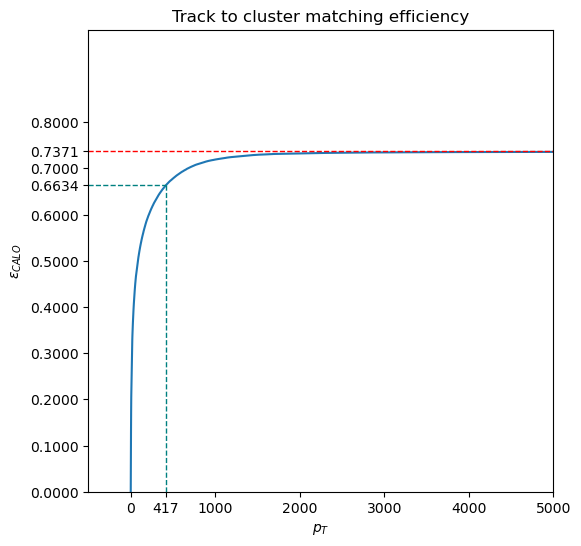

In [25]:
qq = 0.9
acceptable_efficiency_threshold = efficiency_plot_df.efficiency.max() * qq
pt_threshold = efficiency_plot_df.trackPt.iloc[[
    np.where(
        efficiency_plot_df.efficiency > acceptable_efficiency_threshold)[0][0]
]]
# efficiency_plot_df.efficiency.quantile(qq)

xmin, xmax = -500, 5000
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(efficiency_plot_df.trackPt, efficiency_plot_df.efficiency)
ax.vlines(x=[pt_threshold],
          ymin=[0],
          ymax=[acceptable_efficiency_threshold],
          colors='teal',
          ls='--',
          lw=1,
          label=f'{qq*100:2.2f}% of best efficiency')
ax.hlines(
    y=[acceptable_efficiency_threshold,
       efficiency_plot_df.efficiency.max()],
    xmin=[xmin, xmin],
    xmax=[pt_threshold, efficiency_plot_df.trackPt.max()],
    colors=['teal', "red"],
    ls='--',
    lw=1,
)

# plt.xticks(list(plt.xticks()[0]) +  [pt_threshold.values[0]])
plt.xticks([0, pt_threshold.values[0], 1000, 2000, 3000, 4000, 5000])
plt.yticks(
    list(plt.yticks()[0]) +
    [acceptable_efficiency_threshold,
     efficiency_plot_df.efficiency.max()])

ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 1)
ax.set_xlabel("$p_T$")
ax.set_ylabel("$\epsilon_{CALO}$")
plt.title("Track to cluster matching efficiency")

In [26]:
chunk_data["EventTree"].typenames()

{'runNumber': 'int32_t',
 'eventNumber': 'int64_t',
 'lumiBlock': 'int32_t',
 'coreFlags': 'uint32_t',
 'mcEventNumber': 'int32_t',
 'mcChannelNumber': 'int32_t',
 'mcEventWeight': 'float',
 'NPV': 'int32_t',
 'actualInteractionsPerCrossing': 'float',
 'averageInteractionsPerCrossing': 'float',
 'weight_pileup': 'float',
 'correct_mu': 'float',
 'rand_run_nr': 'int32_t',
 'rand_lumiblock_nr': 'int32_t',
 'nTruthPart': 'int32_t',
 'pdgId': 'std::vector<int32_t>',
 'status': 'std::vector<int32_t>',
 'barcode': 'std::vector<int32_t>',
 'truthPartPt': 'std::vector<float>',
 'truthPartE': 'std::vector<float>',
 'truthPartMass': 'std::vector<float>',
 'truthPartEta': 'std::vector<float>',
 'truthPartPhi': 'std::vector<float>',
 'nTrack': 'int32_t',
 'trackPt': 'std::vector<float>',
 'trackP': 'std::vector<float>',
 'trackMass': 'std::vector<float>',
 'trackEta': 'std::vector<float>',
 'trackPhi': 'std::vector<float>',
 'trackNumberOfPixelHits': 'std::vector<int32_t>',
 'trackNumberOfSCTHits'

# Analysis/Modeling
Do work here

Now we try to quantify the correlations among observables that we know should be related for physics arguments. Namely, we inspect the following relationships:

 - `ClusterE` VS `ClusterECalib` in *ClusterTree*
 - `ClusterE` - `ClusterECalib` VS `cluster_EM_PROBABILITY`
 - `truthPt` VS `trackPt` VS `clusterPt`


In [27]:
cluster_cols = [
    #     'runNumber', # always constant
    'eventNumber',
    'truthE',
    'truthPt',
    'truthEta',
    'truthPhi',
    'clusterIndex',
    'nCluster',
    'clusterE',
    'clusterECalib',
    'clusterPt',
    'clusterEta',
    'clusterPhi',
    'cluster_nCells',
    'cluster_sumCellE',
    'cluster_EM_PROBABILITY',
    'cluster_cell_dR_min',
    'cluster_cell_dR_max',
    'cluster_cell_dEta_min',
    'cluster_cell_dEta_max',
    'cluster_cell_dPhi_min',
    'cluster_cell_dPhi_max',
]

clusters = chunk_data["ClusterTree"].arrays(cluster_cols, library="pd")
clusters.head(10)

,eventNumber,truthE,truthPt,truthEta,truthPhi,clusterIndex,nCluster,clusterE,clusterECalib,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE,cluster_EM_PROBABILITY,cluster_cell_dR_min,cluster_cell_dR_max,cluster_cell_dEta_min,cluster_cell_dEta_max,cluster_cell_dPhi_min,cluster_cell_dPhi_max
0,3221919,593.9253,472.8550,0.7011,2.4557,0,2,216.1835,265.8857,173.4400,0.6884,2.4684,80,215.0268,0.0010,0.0123,0.4100,-0.0119,-0.3384,-0.0027,0.2315
1,3221919,593.9253,472.8550,0.7011,2.4557,1,2,12.9073,25.3048,10.5315,0.6597,2.4025,65,13.3174,0.0037,0.0022,0.2715,-0.0002,0.1903,0.0022,-0.1936
2,3221342,30.7986,30.4454,-0.0396,-1.2653,0,4,17.4639,19.0719,17.4629,-0.0110,-1.1603,90,17.6433,0.9442,0.0030,0.1707,0.0002,0.0200,-0.0030,-0.1695
3,3221342,30.7986,30.4454,-0.0396,-1.2653,1,4,2.6350,4.1679,2.6193,-0.1095,-1.4191,16,2.7754,0.0017,0.0175,0.1897,-0.0139,0.1595,0.0107,-0.1026
4,3221342,30.7986,30.4454,-0.0396,-1.2653,2,4,2.0788,3.8687,2.0720,-0.0808,-1.4265,30,2.4041,0.0631,0.0058,0.1042,-0.0000,-0.0094,0.0058,0.1038
5,3221342,30.7986,30.4454,-0.0396,-1.2653,3,4,1.2060,2.3223,1.1987,-0.1104,-1.3227,7,1.2263,0.0013,0.0397,0.1894,-0.0396,0.1604,-0.0026,-0.1008
6,3220742,203.4656,158.3241,0.7381,-2.6365,0,1,34.9368,47.4105,28.5165,0.6590,-2.6067,70,35.2407,0.0010,0.0040,0.2788,-0.0014,-0.2590,0.0038,0.1032
7,3221778,202.2923,194.8662,0.2746,-1.0501,0,2,191.1593,193.4706,182.1872,0.3126,-1.0459,123,191.7386,0.9611,0.0021,0.1460,0.0005,-0.1368,-0.0020,-0.0509
8,3221778,202.2923,194.8662,0.2746,-1.0501,1,2,3.6431,5.7501,3.5548,0.2224,-1.0232,45,3.7527,0.0271,0.0033,0.1142,0.0033,0.1032,-0.0001,0.0489
9,3220395,420.0457,359.7144,0.5713,-2.8661,0,1,379.5362,435.4309,324.0892,0.5769,-2.8858,141,380.0122,0.0010,0.0017,0.4299,-0.0015,-0.3769,0.0006,-0.2067


## `ClusterE` VS `ClusterECalib` correlation

Text(0.5, 1.0, 'Cluster energy VS calibrated energy')

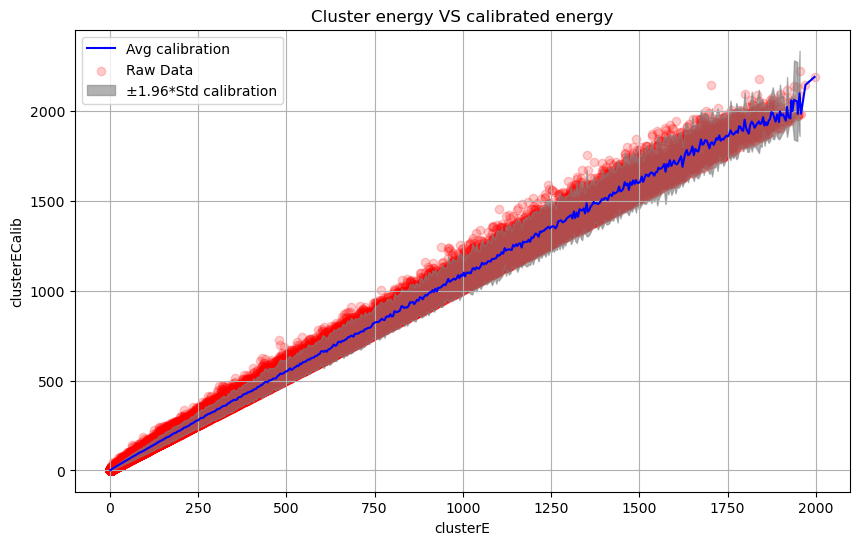

In [28]:
z_alpha2 = 1.96
plot_df = clusters[["clusterE", "clusterECalib"]].sort_values("clusterE")

# Binning the data
num_bins = 500  # You can adjust the number of bins as needed
bins = np.linspace(plot_df["clusterE"].min(), plot_df["clusterE"].max(),
                   num_bins)
plot_df['bin'] = np.digitize(plot_df["clusterE"], bins)

# Aggregating data within each bin
agg_plot_df = plot_df.groupby('bin').agg({
    "clusterE": 'mean',
    "clusterECalib": ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_plot_df["clusterE"],
         agg_plot_df["clusterECalib"]['mean'],
         color='blue',
         label='Avg calibration')
plt.scatter(plot_df["clusterE"],
            plot_df["clusterECalib"],
            color='red',
            alpha=0.2,
            label='Raw Data')
plt.fill_between(list(agg_plot_df["clusterE"].values.flatten()),
                 agg_plot_df["clusterECalib"]['mean'] -
                 z_alpha2 * agg_plot_df["clusterECalib"]['std'],
                 agg_plot_df["clusterECalib"]['mean'] +
                 z_alpha2 * agg_plot_df["clusterECalib"]['std'],
                 color='gray',
                 alpha=0.6,
                 label=f'±{z_alpha2}*Std calibration')

plt.legend()
plt.grid(True)
plt.xlabel("clusterE")
plt.ylabel("clusterECalib")
plt.title('Cluster energy VS calibrated energy')

In [29]:
# Pearson correlation: linear
clusters[["clusterE", "clusterECalib"]].corr("pearson")

,clusterE,clusterECalib
clusterE,1.0000,0.9983
clusterECalib,0.9983,1.0000


In [30]:
# Spearman correlation: monotonic
clusters[["clusterE", "clusterECalib"]].corr("spearman")

,clusterE,clusterECalib
clusterE,1.0000,0.9958
clusterECalib,0.9958,1.0000


In [31]:
# Kendall correlation: ordering
clusters[["clusterE", "clusterECalib"]].corr("kendall")

,clusterE,clusterECalib
clusterE,1.0000,0.9514
clusterECalib,0.9514,1.0000


## `ClusterE` - `ClusterECalib` VS `cluster_EM_PROBABILITY` correlation

/tmp/ipykernel_8034/4064983402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["calibDiff"] = clusters.clusterECalib - clusters.clusterE


Text(0.5, 1.0, 'EM probability VS calibration difference')

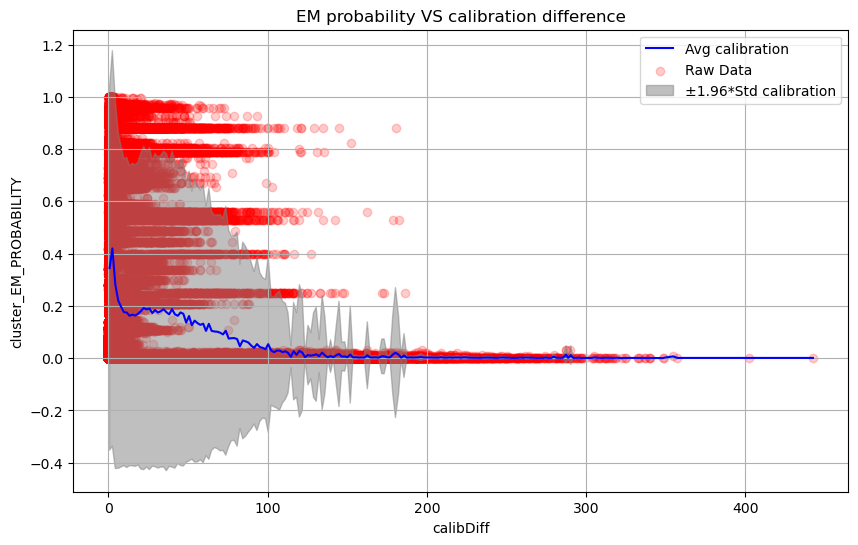

In [32]:
plot_df = clusters[["cluster_EM_PROBABILITY"]]
plot_df["calibDiff"] = clusters.clusterECalib - clusters.clusterE
plot_df = plot_df.sort_values("calibDiff")

# Binning the data
num_bins = 250  # You can adjust the number of bins as needed
bins = np.linspace(plot_df["calibDiff"].min(), plot_df["calibDiff"].max(),
                   num_bins)
plot_df['bin'] = np.digitize(plot_df["calibDiff"], bins)

# Aggregating data within each bin
agg_plot_df = plot_df.groupby('bin').agg({
    "calibDiff": 'mean',
    "cluster_EM_PROBABILITY": ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_plot_df["calibDiff"],
         agg_plot_df["cluster_EM_PROBABILITY"]['mean'],
         color='blue',
         label='Avg calibration')
plt.scatter(plot_df["calibDiff"],
            plot_df["cluster_EM_PROBABILITY"],
            color='red',
            alpha=0.2,
            label='Raw Data')
plt.fill_between(list(agg_plot_df["calibDiff"].values.flatten()),
                 agg_plot_df["cluster_EM_PROBABILITY"]['mean'] -
                 z_alpha2 * agg_plot_df["cluster_EM_PROBABILITY"]['std'],
                 agg_plot_df["cluster_EM_PROBABILITY"]['mean'] +
                 z_alpha2 * agg_plot_df["cluster_EM_PROBABILITY"]['std'],
                 color='gray',
                 alpha=0.5,
                 label=f'±{z_alpha2}*Std calibration')

plt.legend()
plt.grid(True)
plt.xlabel("calibDiff")
plt.ylabel("cluster_EM_PROBABILITY")
plt.title('EM probability VS calibration difference')

In [33]:
# Pearson correlation: linear
plot_df.corr(method="pearson")

,cluster_EM_PROBABILITY,calibDiff,bin
cluster_EM_PROBABILITY,1.0000,-0.2002,-0.2027
calibDiff,-0.2002,1.0000,0.9998
bin,-0.2027,0.9998,1.0000


In [34]:
# Spearman correlation: monotonic
plot_df.corr(method="spearman")

,cluster_EM_PROBABILITY,calibDiff,bin
cluster_EM_PROBABILITY,1.0000,-0.0997,-0.2050
calibDiff,-0.0997,1.0000,0.9087
bin,-0.2050,0.9087,1.0000


In [35]:
# Kendall correlation: ordering
plot_df.corr(method="kendall")

,cluster_EM_PROBABILITY,calibDiff,bin
cluster_EM_PROBABILITY,1.0000,-0.0493,-0.1467
calibDiff,-0.0493,1.0000,0.8164
bin,-0.1467,0.8164,1.0000


## `trackPt` VS `total_matched_clusterPt`

In [36]:
def track_to_cluster_matching(group_df, R_thresh=0.2):
    # Merge track to clusters for this eventNumber
    association_df = group_df.merge(single_track_clusters[
        single_track_clusters.eventNumber == group_df.eventNumber.values[0]],
                                    on="eventNumber")
    association_df.drop("eventNumber", axis=1, inplace=True)
    
    # Calculate deltaEta and deltaPhi
    association_df[
        "deltaEta"] = association_df.trackEta - association_df.clusterEta
    association_df["deltaPhi"] = compute_phi_diff(association_df.trackPhi,
                                                  association_df.clusterPhi)

    # Calculate deltaR
    association_df["deltaR"] = (
        association_df.deltaEta**2 +
        association_df.deltaPhi**2).apply(lambda x: np.sqrt(x))

    # Check if any deltaR is less than threshold
    association_df["matching_cluster"] = association_df.deltaR < R_thresh
    return association_df


# Apply the function to each group of eventNumber
# selected_tracks = track_df[~track_df.trackPt.isna()].eventNumber
# selected_clusters = cluster_df[~cluster_df.clusterE.isna()].eventNumber
# selected_events = list(set(selected_tracks).intersection(selected_clusters))

association_df = single_track_events.iloc[:1000].groupby('eventNumber').progress_apply(
    track_to_cluster_matching)
association_df

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 257.96it/s]


trackPt trackEta trackPhi  matching clusterE clusterPt  \
eventNumber                                                             
3220003     0 168.6425   0.1947  -1.0697      True 561.3667  552.3148   
3220004     0 181.5669  -0.2814   2.4788      True 168.3326  162.7124   
            1 181.5669  -0.2814   2.4788      True   1.1317    1.0640   
            2 181.5669  -0.2814   2.4788      True   0.5887    0.5879   
            3 181.5669  -0.2814   2.4788      True   0.4320    0.4264   
...                ...      ...      ...       ...      ...       ...   
3223988     0 120.3275  -0.2813   0.7110      True 160.9175  155.5726   
            1 120.3275  -0.2813   0.7110      True   0.2522    0.2469   
3223991     0  73.5318  -0.7262   1.8702      True 338.3307  271.9528   
            1  73.5318  -0.7262   1.8702      True   2.3604    1.9625   
3223997     0  11.5185  -2.3772  -2.3422     False   0.1289    0.1203   

              clusterEta clusterPhi cluster_cell_dR_min cluster_cell_dR_max  \
eventNumber                                                                   
3220003     0     0.1808    -1.0667              0.0075              0.3134   
3220004     0    -0.2621     2.4890              0.0065              0.3568   
            1    -0.3549     2.2262              0.0180              0.1560   
            2     0.0533     2.4169              0.0121              0.1508   
            3    -0.1622     2.6154              0.0031              0.1078   
...                  ...        ...                 ...                 ...   
3223988     0    -0.2614     0.7339              0.0042              0.3668   
            1    -0.2074     0.9340              0.0075              0.2301   
3223991     0    -0.6852     1.8489              0.0079              0.2264   
            1    -0.6265     1.9888              0.0334              0.3530   
3223997     0     0.3742     2.7336              0.0029              0.0584   

              cluster_cell_dEta_min cluster_cell_dEta_max  \
eventNumber                                                 
3220003     0               -0.0050                0.2692   
3220004     0                0.0009               -0.2879   
            1                0.0049                0.1049   
            2               -0.0033               -0.1033   
            3                0.0012               -0.0064   
...                             ...                   ...   
3223988     0                0.0005                0.3114   
            1                0.0074                0.2074   
3223991     0               -0.0018               -0.0158   
            1               -0.0235                0.2265   
3223997     0                0.0019                0.0519   

              cluster_cell_dPhi_min cluster_cell_dPhi_max  \
eventNumber                                                 
3220003     0               -0.0056               -0.1605   
3220004     0                0.0064                0.2108   
            1               -0.0173               -0.1154   
            2               -0.0116               -0.1098   
            3                0.0028               -0.1076   
...                             ...                   ...   
3223988     0                0.0042               -0.1939   
            1               -0.0013               -0.0995   
3223991     0                0.0077               -0.2258   
            1                0.0238               -0.2707   
3223997     0                0.0021                0.0267   

              m_cluster_cell_centerCellEta m_cluster_cell_centerCellPhi  \
eventNumber                                                               
3220003     0                       0.1758                      -1.0723   
3220004     0                      -0.2611                       2.4954   
            1                      -0.3500                       2.2089   
            2                       0.0500                       2.4053   

In [37]:
plot_df = association_df.groupby("eventNumber").first()[["trackPt"]]
plot_df

,trackPt
eventNumber,
3220003,168.6425
3220004,181.5669
3220008,47.8311
3220009,941.4652
3220014,18.0632
...,...
3223979,2.1248
3223981,11.9740
3223988,120.3275


(0.0, 2000.0)

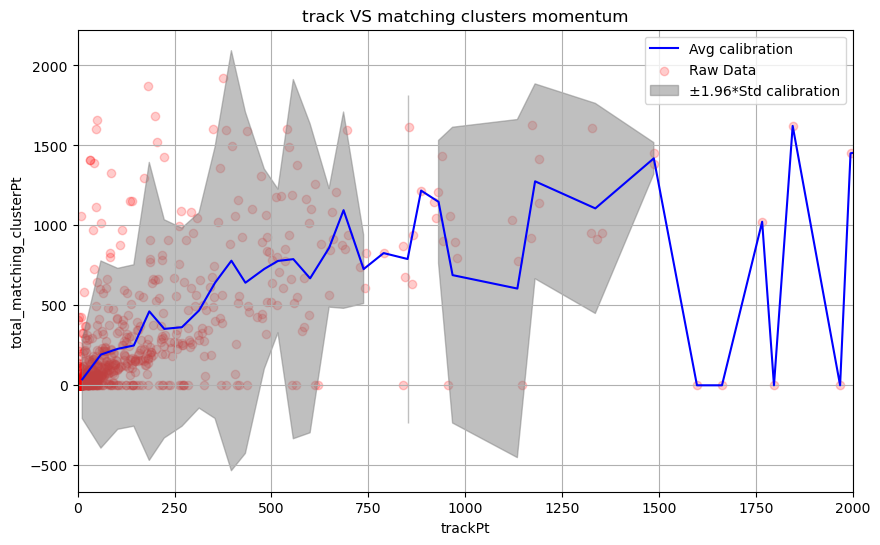

In [39]:
plot_df = association_df.groupby("eventNumber").first()[["trackPt"]]
plot_df["total_matching_clusterPt"] = association_df.groupby(
    'eventNumber').apply(lambda x:
                         (x['clusterPt'] * x['matching_cluster']).sum()).values
# plot_df = plot_df.sort_values("trackPt")

# Binning the data
num_bins = 250  # You can adjust the number of bins as needed
bins = np.linspace(plot_df["trackPt"].min(), plot_df["trackPt"].max(),
                   num_bins)
plot_df['bin'] = np.digitize(plot_df["trackPt"], bins)

# Aggregating data within each bin
agg_plot_df = plot_df.groupby('bin').agg({
    "trackPt":
    'mean',
    "total_matching_clusterPt": ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_plot_df["trackPt"],
         agg_plot_df["total_matching_clusterPt"]['mean'],
         color='blue',
         label='Avg calibration')
plt.scatter(plot_df["trackPt"],
            plot_df["total_matching_clusterPt"],
            color='red',
            alpha=0.2,
            label='Raw Data')
plt.fill_between(list(agg_plot_df["trackPt"].values.flatten()),
                 agg_plot_df["total_matching_clusterPt"]['mean'] -
                 z_alpha2 * agg_plot_df["total_matching_clusterPt"]['std'],
                 agg_plot_df["total_matching_clusterPt"]['mean'] +
                 z_alpha2 * agg_plot_df["total_matching_clusterPt"]['std'],
                 color='gray',
                 alpha=0.5,
                 label=f'±{z_alpha2}*Std calibration')

plt.legend()
plt.grid(True)
plt.xlabel("trackPt")
plt.ylabel("total_matching_clusterPt")
plt.title('track VS matching clusters momentum')
plt.xlim(0,2000)

In [40]:
# Pearson correlation: linear
plot_df.query("trackPt < 2000").corr(method="pearson")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.6146,0.9990
total_matching_clusterPt,0.6146,1.0000,0.6099
bin,0.9990,0.6099,1.0000


In [41]:
plot_df.corr(method="pearson")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.3997,0.9997
total_matching_clusterPt,0.3997,1.0000,0.3946
bin,0.9997,0.3946,1.0000


In [42]:
# Spearman correlation: monotonic
plot_df.query("trackPt < 2000").corr(method="spearman")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.7101,0.9099
total_matching_clusterPt,0.7101,1.0000,0.6413
bin,0.9099,0.6413,1.0000


In [43]:
# Kendall correlation: ordering
plot_df.query("trackPt < 2000").corr(method="kendall")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.5888,0.8191
total_matching_clusterPt,0.5888,1.0000,0.5379
bin,0.8191,0.5379,1.0000


# Results
Show graphs and stats here

# Open Points and Future Work
Summarize findings here